<a href="https://colab.research.google.com/github/Rajalakshmi2025/OIBSIP_DataScience_Task2/blob/main/Unemployment_Rate_Analysis_in_India_During_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
To analyze unemployment trends in India with a focus on the COVID-19 period, using data visualization and statistical techniques to understand regional and national patterns in unemployment.


Unemployment_Rate_upto_11_2020.csv – includes additional features like coordinates and region grouping

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# Load Dataset
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')


In [ ]:
# Show first 5 rows of dataset

print("\nDataset :")
print(df.head())



Dataset :
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1

In [ ]:


print("\nDataset  Info:")
print(df.info())



Dataset  Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [ ]:
print("\nMissing Values in Dataset :")
print(df.isnull().sum())


Missing Values in Dataset :
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(f"Dataset 2 shape: {df.shape}")

Dataset 2 shape: (267, 9)


# Data preprocessing

In [ ]:
# Rename Columns for Consistency
# Clean column names in df
df.columns = df.columns.str.strip()


In [ ]:
#Convert 'Date' Column to Datetime Format

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
#Add Month Column (for Monthly Trends)
df['Month'] = df['Date'].dt.month

In [ ]:
# Rename for easier access (Dataset 2)
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate'
}, inplace=True)

In [ ]:
df.head()


,Region,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Region.1,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


# Exploratory Data Analysis (EDA)

Unemployment Rate Over Time – One State

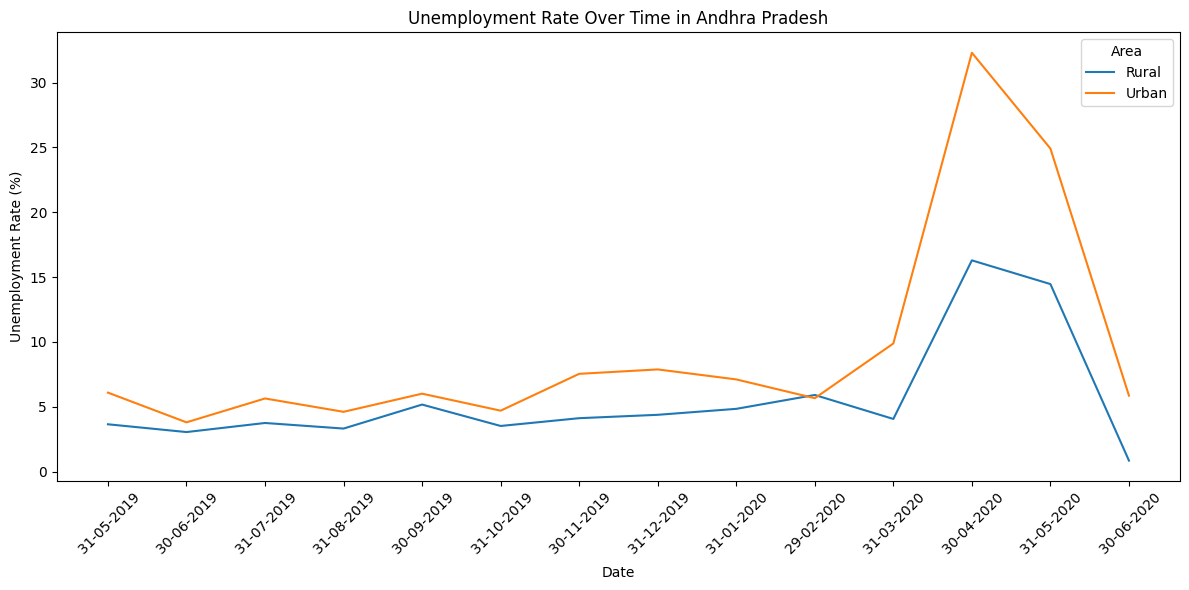

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Andhra Pradesh
andhra_data = df1[df1['Region'] == 'Andhra Pradesh']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=andhra_data, hue='Area')
plt.title('Unemployment Rate Over Time in Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**insights:**
1.The unemployment rate in Andhra Pradesh shows fluctuations over time.

2.There's a noticeable spike during the lockdown months (April–June 2020), particularly in urban areas, which were more affected.

3.Rural areas maintained more stability compared to urban zones.



 Unemployment Rate by Region



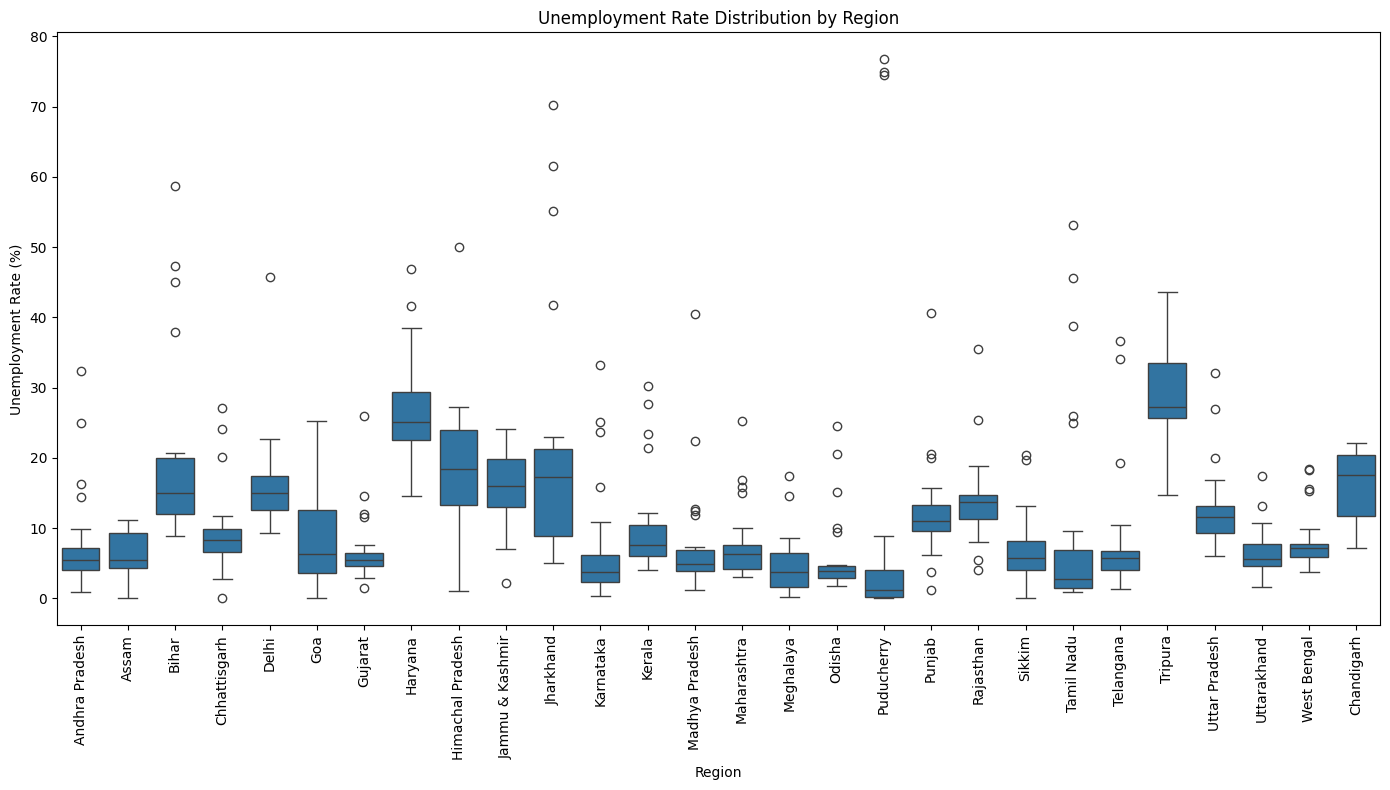

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1)
plt.title('Unemployment Rate Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Insight:**

1.Regions exhibit different unemployment trends.

2.Urban areas tend to have higher unemployment rates compared to rural regions.

3.States like Delhi, Bihar, and Tamil Nadu showed sharp increases, indicating regional vulnerabilities to economic shocks.



Rural vs Urban Unemployment




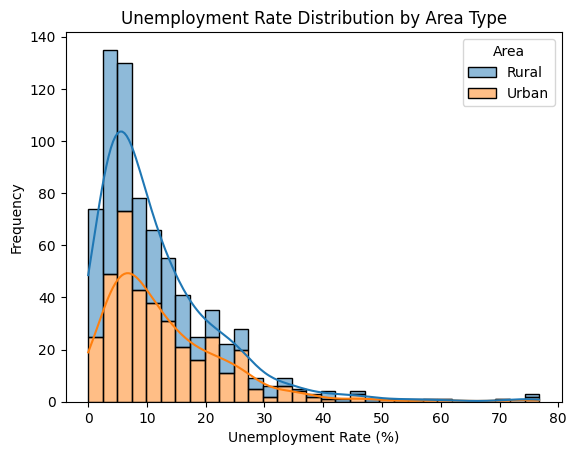

In [ ]:
sns.histplot(data=df1, x='Estimated Unemployment Rate (%)', hue='Area', kde=True, multiple='stack')
plt.title('Unemployment Rate Distribution by Area Type')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


1.Slightly more data from rural areas, but urban areas show higher variance in unemployment.

2.Urban zones may be more economically volatile during crises.



 Correlation Between Key Metrics

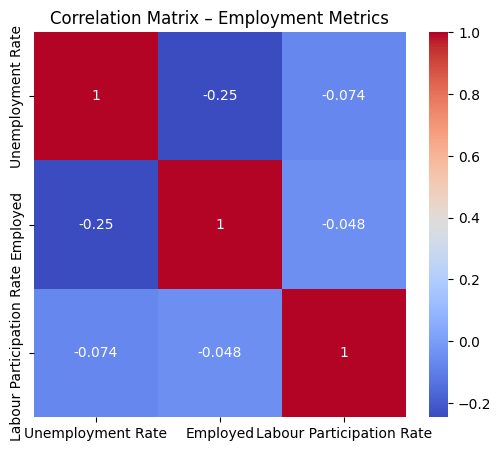

In [ ]:
heat_data = df2[['Unemployment Rate', 'Employed', 'Labour Participation Rate']]
correlation = heat_data.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix – Employment Metrics')
plt.show()


1.Strong negative correlation between unemployment rate and employment count.

2.Labour Participation Rate has a positive correlation with employment and a weak negative link with unemployment.

3.Confirms that higher unemployment = fewer people employed.

 Before & After Lockdown Comparison (April–June vs. Jan–Mar)



In [ ]:
after_lockdown = df[df['Month'].between(4, 6)]
before_lockdown = df[df['Month'].between(1, 3)]

# Group by state
after_avg = after_lockdown.groupby('Region')['Unemployment Rate'].mean().reset_index()
before_avg = before_lockdown.groupby('Region')['Unemployment Rate'].mean().reset_index()

# Merge for comparison
comparison = before_avg.merge(after_avg, on='Region', suffixes=('_Before', '_After'))

# Rename columns
comparison.columns = ['State', 'Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']
comparison.head()

,State,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


1.Every state shows a rise in unemployment after lockdown.

2.Bihar, Delhi, Tripura, and Puducherry saw the sharpest increases.

3.Some states like Assam and Chhattisgarh were less affected, suggesting regional economic resilience.

Lockdown Impact by State



<Figure size 1200x600 with 0 Axes>

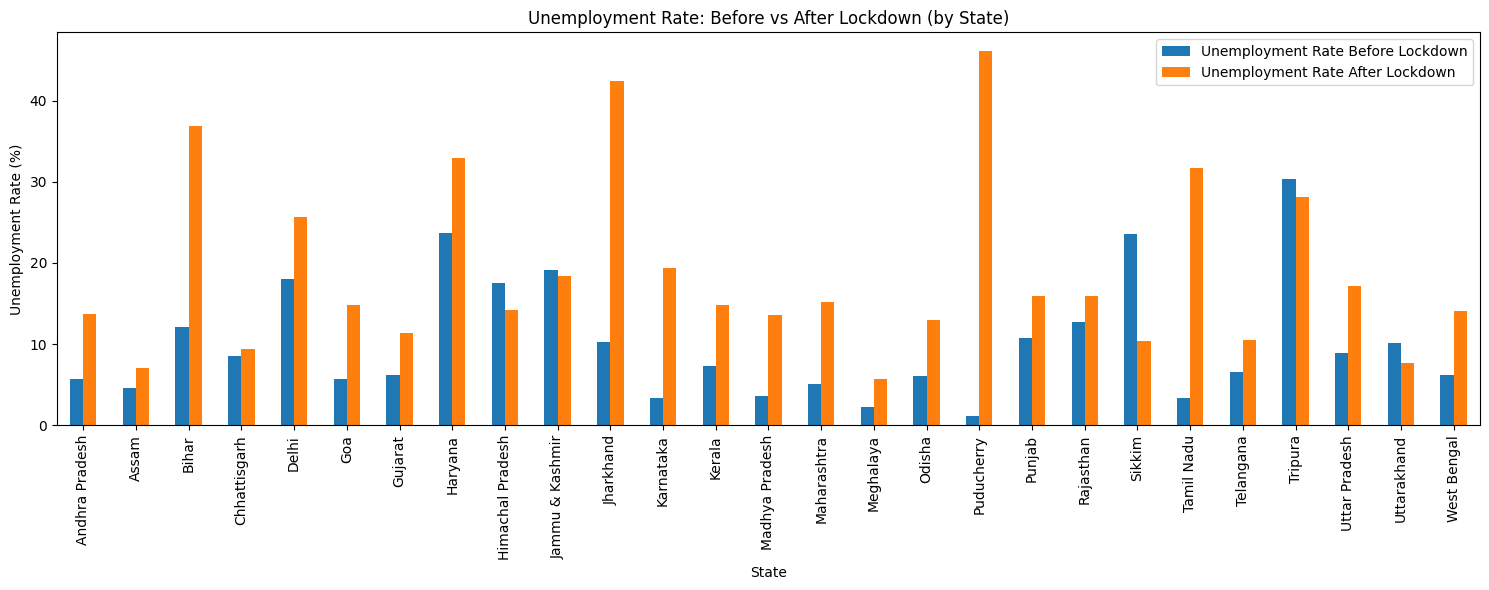

In [ ]:
plt.figure(figsize=(12, 6))
comparison.set_index('State')[['Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']].plot(kind='bar', figsize=(15, 6))
plt.title('Unemployment Rate: Before vs After Lockdown (by State)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


1.Significant Increase in Unemployment Post-Lockdown
Most states experienced a sharp rise in unemployment after the lockdown (April–June 2020), indicating economic disruption across sectors.

2.Highest Spike: Puducherry
*  Before lockdown: ~1%
*   After lockdown: ~46%

 Puducherry saw the most extreme surge, reflecting a collapse in local employment, possibly due to tourism and service sector dependency.

3.Other Severely Affected States

* Bihar: Rose from ~12% to ~37%

* Karnataka: ~4% to ~19%

* Haryana and Tamil Nadu also saw rates more than double.

4.States with Minor Impact

* Chhattisgarh, Odisha, Assam, and Meghalaya showed relatively stable unemployment trends, possibly due to:

* Larger rural/agriculture-based economies

* Less dependency on volatile sectors

5.Urban vs Rural Trend:

States with larger urban populations faced more severe unemployment hikes, underscoring the vulnerability of the industrial and service sectors during the pandemic.



# Insights and Conclusion

This project aimed to analyze unemployment trends in India, especially focusing on the impact of COVID-19 lockdowns. Two datasets were used to understand temporal and spatial variations in unemployment, labor participation, and employment levels.

**Key Insights**

1.Significant Spike Post Lockdown: Most states, especially Bihar, Delhi, Puducherry, and Tripura, witnessed a steep rise in unemployment during and immediately after lockdown.

2.Urban vs Rural Divide: Urban areas showed consistently higher unemployment rates compared to rural areas, suggesting stronger economic shock in urban labor markets.

3.Regional Differences: States in the North and East showed greater variability and higher peaks in unemployment. Southern states were comparatively more stable.

4.Before vs After Lockdown Comparison: Visual comparison showed a substantial rise in unemployment rates in most states post-lockdown, with some states more severely impacted.

5.Correlation Matrix: There’s a negative correlation between unemployment rate and both employed population and labour force participation, affirming expected economic behavior.

**Tools & Techniques Used:**

Python (Pandas, Matplotlib, Seaborn)

Data preprocessing & cleaning

Time-series analysis & decomposition

Comparative bar plots and histograms

Heatmaps for correlation analysis



This analysis provides strong visual and statistical evidence of how the pandemic affected employment in India, especially during the 2020 lockdown phase. Such insights are vital for policy planning, economic forecasting, and state-level recovery efforts.